## Credit Data Analysis

#### Load Data

In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import sklearn as sk
import os
from matplotlib import pyplot as plt
%matplotlib inline
data = pd.read_csv("dmagecr.csv",sep=';')

In [2]:
data.describe()

,checking,duration,history,purpose,amount,employed,installp,marital,coapp,resident,...,age,other,housing,existcr,job,depends,telephon,foreign,savings,Target
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.708000,3271.258000,3.384000,2.973000,2.68200,1.145000,2.845000,...,35.546000,2.675000,1.929000,1.407000,2.904000,1.155000,1.404000,1.037000,2.105000,0.300000
std,1.257638,12.058814,1.08312,2.644945,2822.736876,1.208306,1.118715,0.70808,0.477706,1.103718,...,11.375469,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,1.580023,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.500000,3.000000,2.000000,2.00000,1.000000,2.000000,...,27.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.500000,3.000000,3.000000,3.00000,1.000000,3.000000,...,33.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.250000,5.000000,4.000000,3.00000,1.000000,4.000000,...,42.000000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,4.000000,72.000000,4.00000,9.000000,18424.000000,5.000000,4.000000,4.00000,3.000000,4.000000,...,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,5.000000,1.000000


### Get distribution of contineous variables

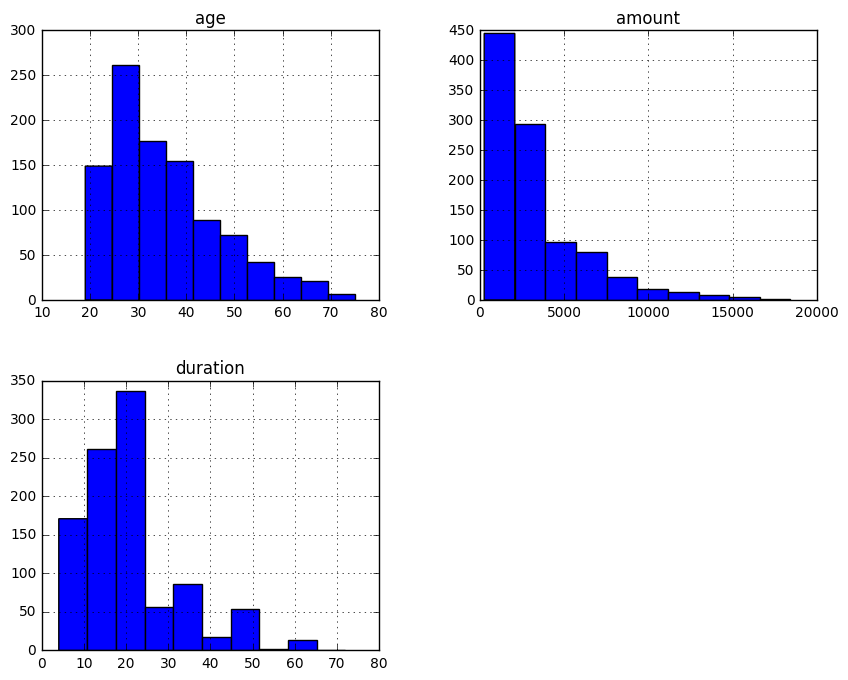

In [3]:
## Get Plots of contineous variables
catVars = ['checking','purpose','job','marital','foreign']
conVars = [col for col in data.columns if col not in catVars]
#plt.figure()
i=data[['age','amount','duration']].hist(figsize=(10,8))

### Get Stacked charts for other variables

/m/home/home8/81/nautiys1/unix/jupyter/venv/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


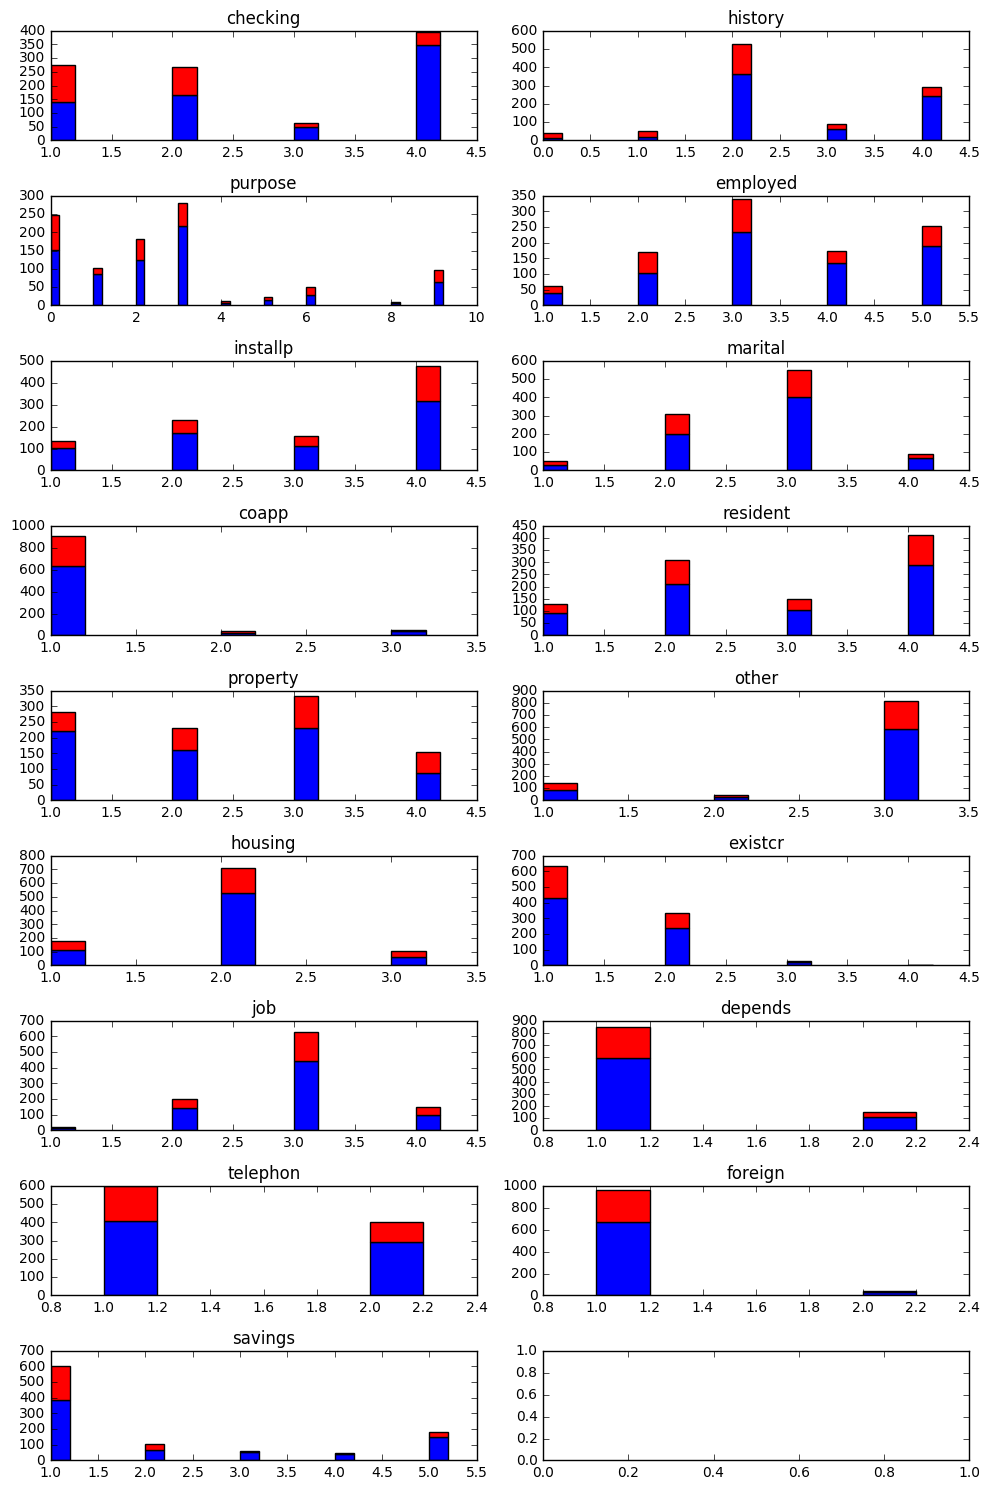

In [5]:
#bar plots with good and bad percentages
cols = [col for col in data.columns if col not in ['Target','good_bad','amount','duration','age']]
fig,ax = plt.subplots(figsize=(10,15),nrows =len(conVars)/2 +1 ,ncols=2)
g = data.groupby('Target')
i = 0
c = 0
for col in cols:
    #print col,i,c
    good = g.get_group(0)[col].value_counts()
    bad = g.get_group(1)[col].value_counts()
    for k in good.index:
        #print k,good[k],bad[k]
        P1 = ax[i,c].bar(k,good[k],0.2,color='b',label='Good')
        if k in bad:
            P2 = ax[i,c].bar(k,bad[k],0.2,color='r',label='bad',bottom=good[k])
    ax[i,c].set_title(col)    
    if c == 1:
        i = i+ 1
        c = 0
    else:
        c = c+1
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.legend()
plt.show()

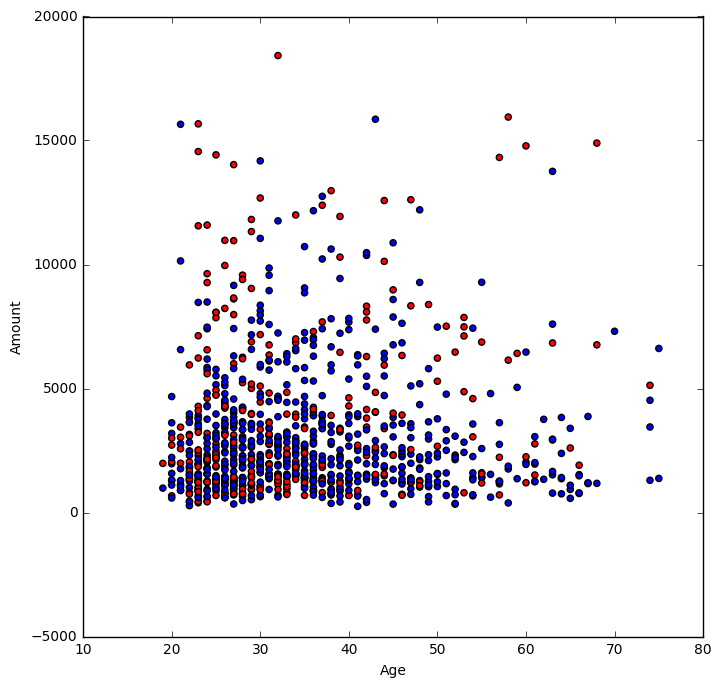

In [6]:
## Check relaitonship between age, amount and duration
colors = {0: 'b', 1: 'r'}
fig,ax = plt.subplots(figsize=(8,8),nrows=1,ncols=1)
ax.scatter(data['age'],data['amount'],c=[colors[i] for i in data['Target']])
ax.set_xlabel('Age')
ax.set_ylabel('Amount')
#ax[1].scatter(data['age'],data['duration'],c=[colors[i] for i in data['Target']])
#ax[1].set_xlabel('Age')
#ax[1].set_ylabel('Duration')
#ax[2].scatter(data['duration'],data['amount'],c=[colors[i] for i in data['Target']])
#ax[2].set_xlabel('Duration')
#ax[2].set_ylabel('Amount')

### Chi Square Independence test for categorical variables


In [7]:
pValues = {}
for col in cols:
    ct1 = pd.crosstab(data['Target'],data[col])
    colsum = ct1.sum(axis=0)
    chi,p,a,b = sc.stats.chi2_contingency(ct1)
    pValues[col]=p
    
for k in sorted(pValues, key=pValues.get):
    print k,"|", pValues[k]

checking | 1.21890207229e-26
history | 1.27918729568e-12
savings | 2.76121423857e-07
property | 2.85844157333e-05
purpose | 5.47211504115e-05
housing | 0.000111674653746
employed | 0.00104545234914
other | 0.00162931781865
foreign | 0.0158307549029
marital | 0.0222380054693
coapp | 0.0360559540272
installp | 0.140033312213
telephon | 0.278876154304
existcr | 0.445144080008
job | 0.596581591884
resident | 0.861552132041
depends | 1.0


In [8]:
### dummifying the variables
data_wodummy = data.copy(deep=True) 
dummy_data = pd.get_dummies(data=data,columns=cols)
del dummy_data['good_bad']
del data_wodummy['good_bad']
workData = data_wodummy

## Modelling

    - Logistic regression as baseline
    - Logistic Regression with dummy variables and regularization
    - Random Forest
    - SVM 
    - SVM with dummy variables

In [9]:
### Logistic regression
from sklearn import linear_model
from sklearn import metrics

In [10]:
## get the split
ind = np.random.rand(1000) < 0.70
training = workData[ind]
test = workData[ind]
columns = [col for col in training.columns if col not in ['Target']]
logReg = linear_model.LogisticRegression()
logReg.fit(X=training[columns],y=training['Target'])
predictions = logReg.predict(X=test[columns])
preds = logReg.predict_proba(test[columns])
fprRg, tprRg, _ = metrics.roc_curve(test['Target'], preds[:,0])
print metrics.classification_report(y_true=test['Target'],y_pred=predictions)

             precision    recall  f1-score   support

          0       0.80      0.89      0.84       484
          1       0.65      0.48      0.55       211

avg / total       0.75      0.76      0.75       695



In [265]:
## Cross Validation
from sklearn.model_selection import train_test_split
trainingX,trainingY,testX,testY = train_test_split(is.data, iris.target, test_size=0.4, random_state=0)

In [223]:
### Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
ind = np.random.rand(1000) < 0.70
training = workData[ind]
test = workData[ind]
columns = [col for col in training.columns if col not in ['Target']]
clrf = RandomForestClassifier()
clrf.fit(X=training[columns],y=training['Target'])
predictions = clrf.predict(X=test[columns])
preds = clrf.predict_proba(test[columns])
fprRf, tprRf, _ = metrics.roc_curve(test['Target'], preds[:,0])
print metrics.classification_report(y_true=test['Target'],y_pred=predictions)


             precision    recall  f1-score   support

          0       0.98      1.00      0.99       491
          1       1.00      0.95      0.97       219

avg / total       0.98      0.98      0.98       710



In [12]:
### Classificatoin tree 
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [13]:
ind = np.random.rand(1000) < 0.70
training = workData[ind]
test = workData[ind]
columns = [col for col in training.columns if col not in ['Target']]
dt = DecisionTreeClassifier(min_samples_split=20, random_state=99)
dt.fit(X=training[columns],y=training['Target'])
predictions = dt.predict(X=test[columns])
preds = dt.predict_proba(test[columns])
fprDt, tprDt, _ = metrics.roc_curve(test['Target'], preds[:,0])
print metrics.classification_report(y_true=test['Target'],y_pred=predictions)


             precision    recall  f1-score   support

          0       0.87      0.94      0.91       505
          1       0.83      0.67      0.74       207

avg / total       0.86      0.86      0.86       712



In [22]:
import pydot
import StringIO
dotfile = StringIO.StringIO()
export_graphviz(dt, out_file = dotfile, feature_names = columns)
#dotfile.close()
#dotfile = open("treepaths", 'r')
a=pydot.graph_from_dot_data(dotfile.getvalue())
a